## Decision Tree - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
10/344

0.029069767441860465

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [15]:
df.loc[336, "sex"] = "MALE"

In [16]:
df.loc[336, "sex"]

'MALE'

## Visualization

In [17]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

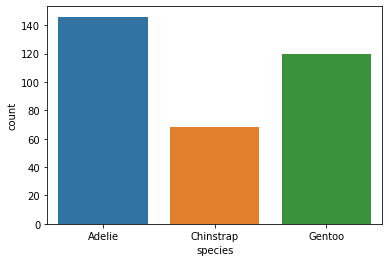

In [18]:
sns.countplot(x="species", data = df);

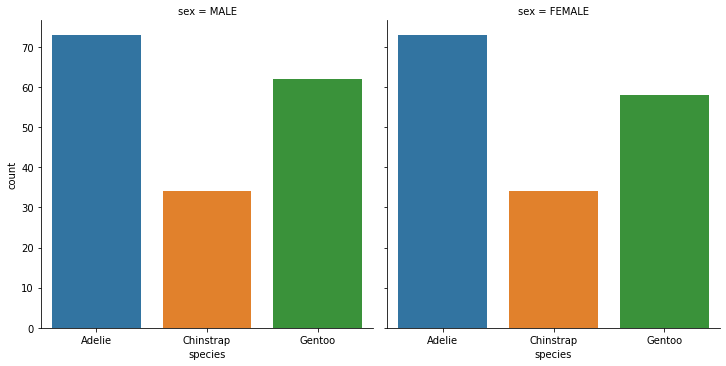

In [19]:
sns.catplot(x='species', data=df, kind='count',col='sex')

<Figure size 864x432 with 0 Axes>

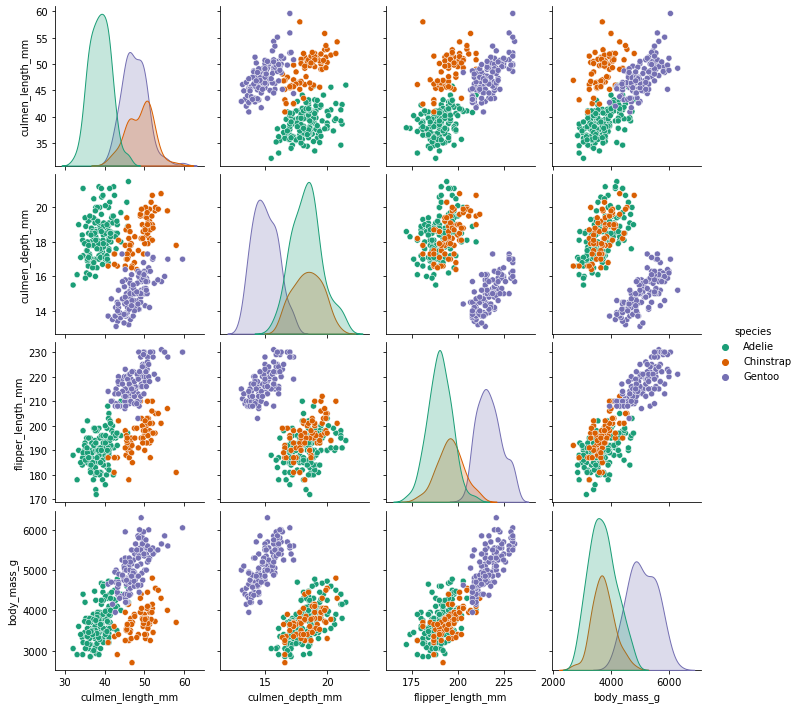

In [20]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [21]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [22]:
df_2 = df.copy()
df_2["species"] = df_2["species"].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})

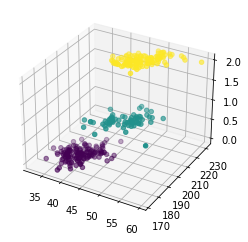

In [23]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_2['culmen_length_mm'], df_2['flipper_length_mm'], df_2['species'], c =df_2['species'] );

In [24]:
df.select_dtypes("number")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [25]:
# df._get_numeric_data()

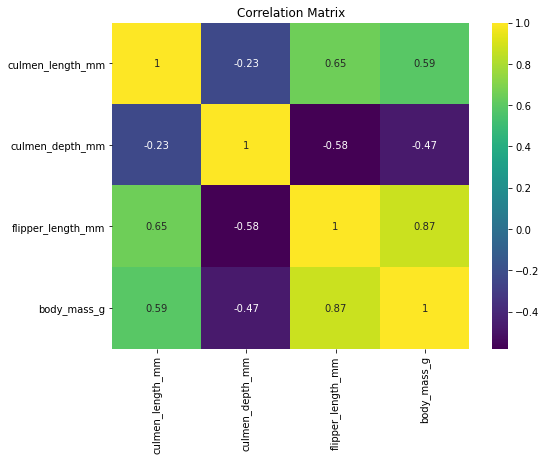

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df._get_numeric_data().corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Feature Engineering

In [27]:
df.drop("species", axis =1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [29]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelling - Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DT_model = DecisionTreeClassifier(random_state=101)

In [34]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [35]:
y_pred = DT_model.predict(X_test)

## Model Performance on Classification Tasks

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
confusion_matrix(y_test, y_pred)

array([[40,  1,  0],
       [ 2, 21,  0],
       [ 0,  0, 37]], dtype=int64)

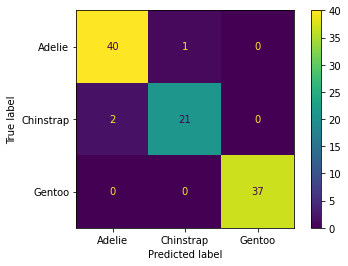

In [38]:
plot_confusion_matrix(DT_model,X_test,y_test)

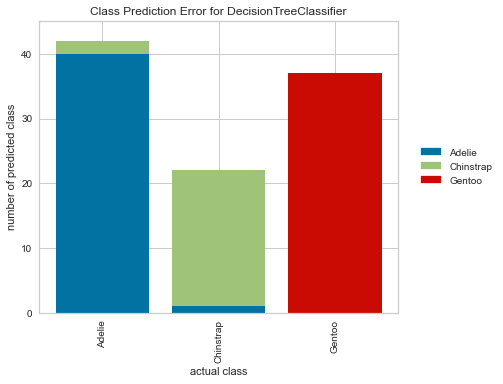

In [39]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



## Cross Validate

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [42]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
1,0.002999,0.003001,0.958333,0.969697,0.933333,0.947090
2,0.002001,0.003001,0.958333,0.966667,0.966667,0.964912
3,0.002001,0.003000,0.916667,0.911111,0.929630,0.916756
4,0.003020,0.000000,0.956522,0.962963,0.933333,0.943355
5,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
7,0.015625,0.000000,1.000000,1.000000,1.000000,1.000000
8,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
9,0.000000,0.000000,0.869565,0.900000,0.856061,0.867725
10,0.015626,0.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_macro    0.971044
test_recall_macro       0.961902
test_f1_macro           0.963984
dtype: float64

## Feature Importances

In [44]:
DT_model.feature_importances_

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [45]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.052893
island_Dream,0.078360
culmen_length_mm,0.325918
flipper_length_mm,0.542829


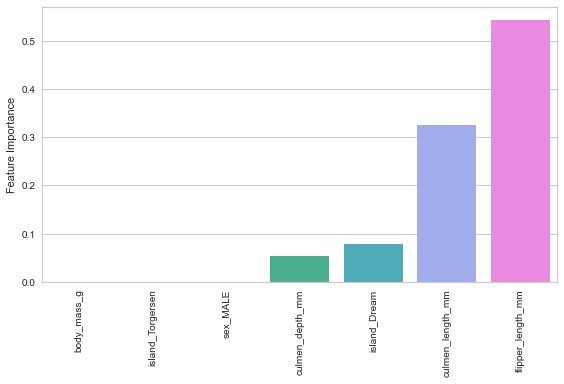

In [46]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

In [47]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# The feature that weighs too much on the estimate can sometimes cause overfitting. For this reason, the most important feature can be dropped and the scores can be checked again

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [49]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [50]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [51]:
y_pred2 = DT2_model.predict(X_test2)

In [52]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [53]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
1,0.003001,0.057281,1.000000,1.000000,1.000000,1.000000
2,0.000000,0.015626,1.000000,1.000000,1.000000,1.000000
3,0.000000,0.000000,0.958333,0.944444,0.966667,0.952153
4,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
5,0.000000,0.015627,1.000000,1.000000,1.000000,1.000000
6,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
7,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
8,0.015625,0.000000,1.000000,1.000000,1.000000,1.000000
9,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
10,0.000000,0.000000,0.956522,0.962963,0.969697,0.964519


In [54]:
df_scores.mean()[2:]

test_accuracy           0.991486
test_precision_macro    0.990741
test_recall_macro       0.993636
test_f1_macro           0.991667
dtype: float64

## Visualize the Tree

In [55]:
from sklearn.tree import plot_tree

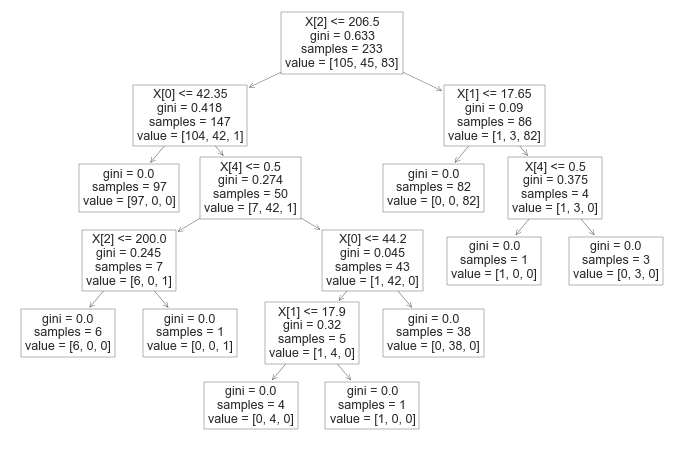

In [56]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);

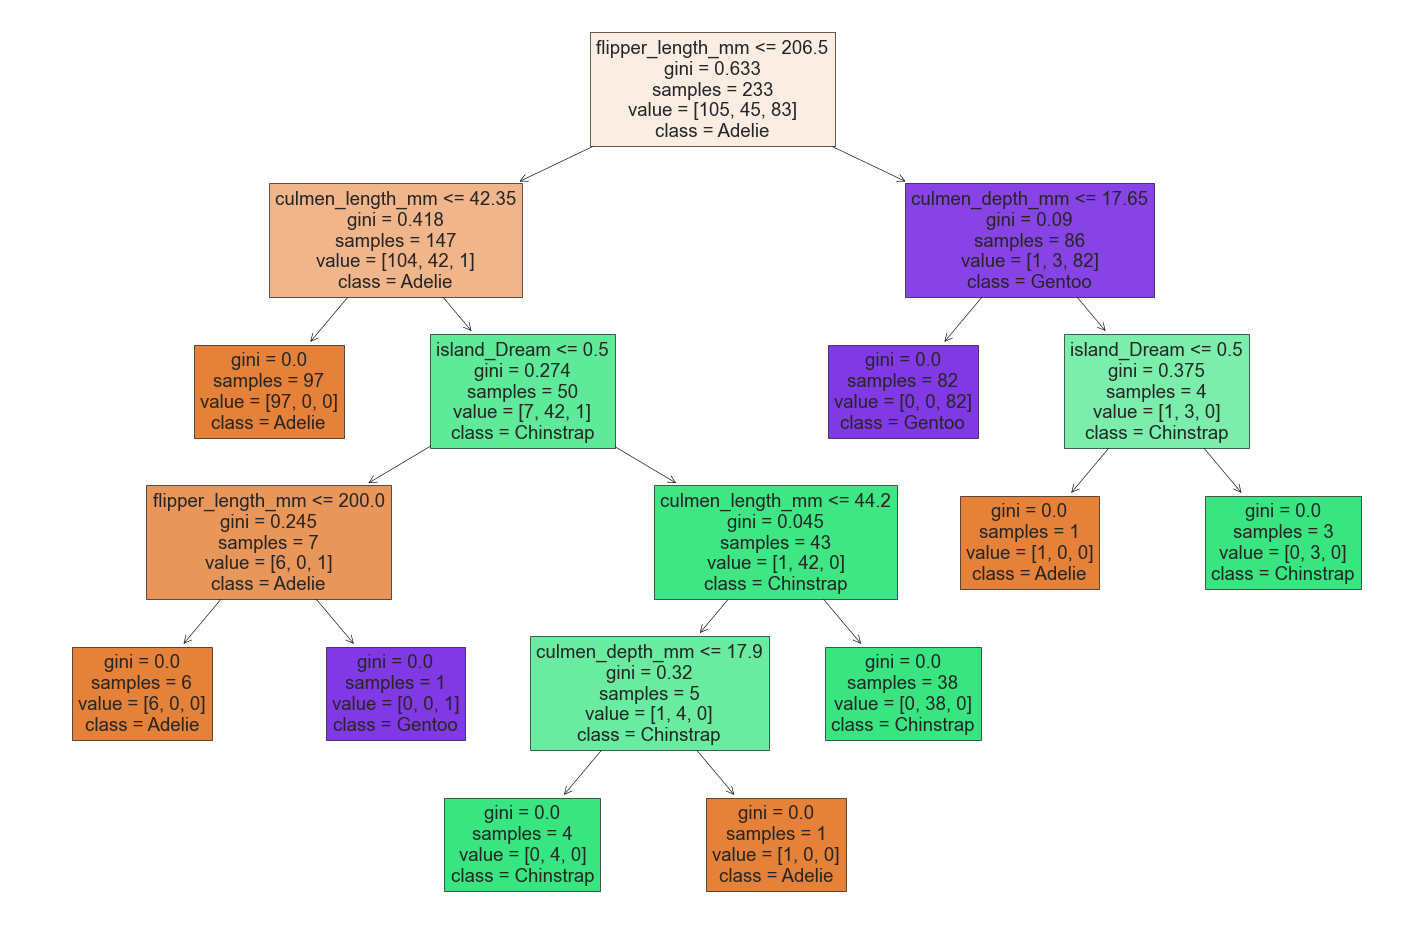

In [57]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());

## Understanding Hyperparameters

### Max Depth

In [58]:
def report_model(model):
    model_pred = model.predict(X_test)
    print('\n')
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [59]:
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=101)



[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





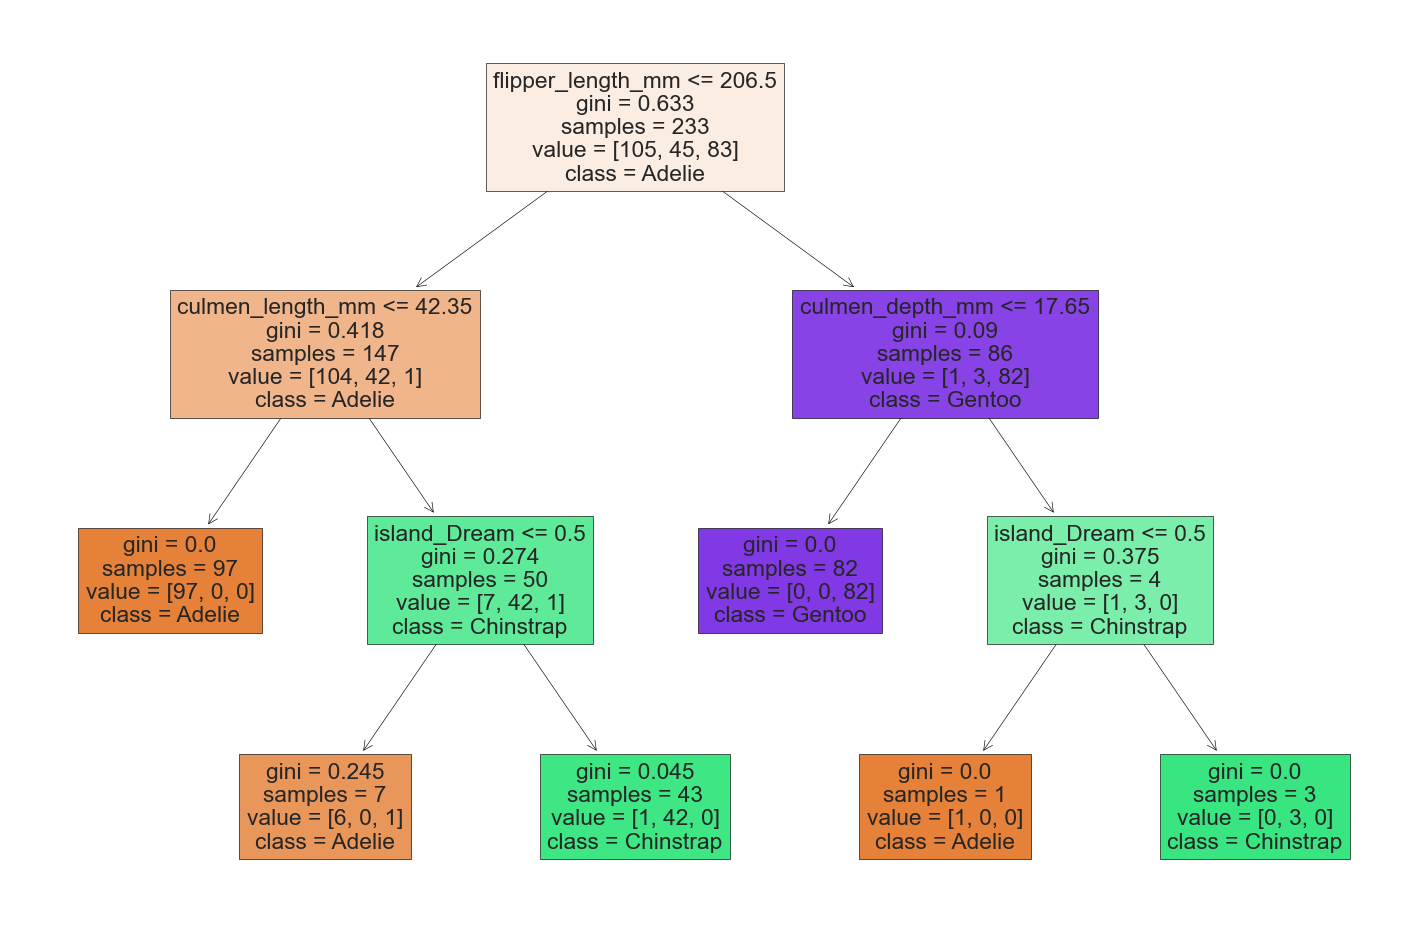

In [60]:
report_model(pruned_tree)

## Max Leaf Nodes

In [61]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=101)
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=101)



[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





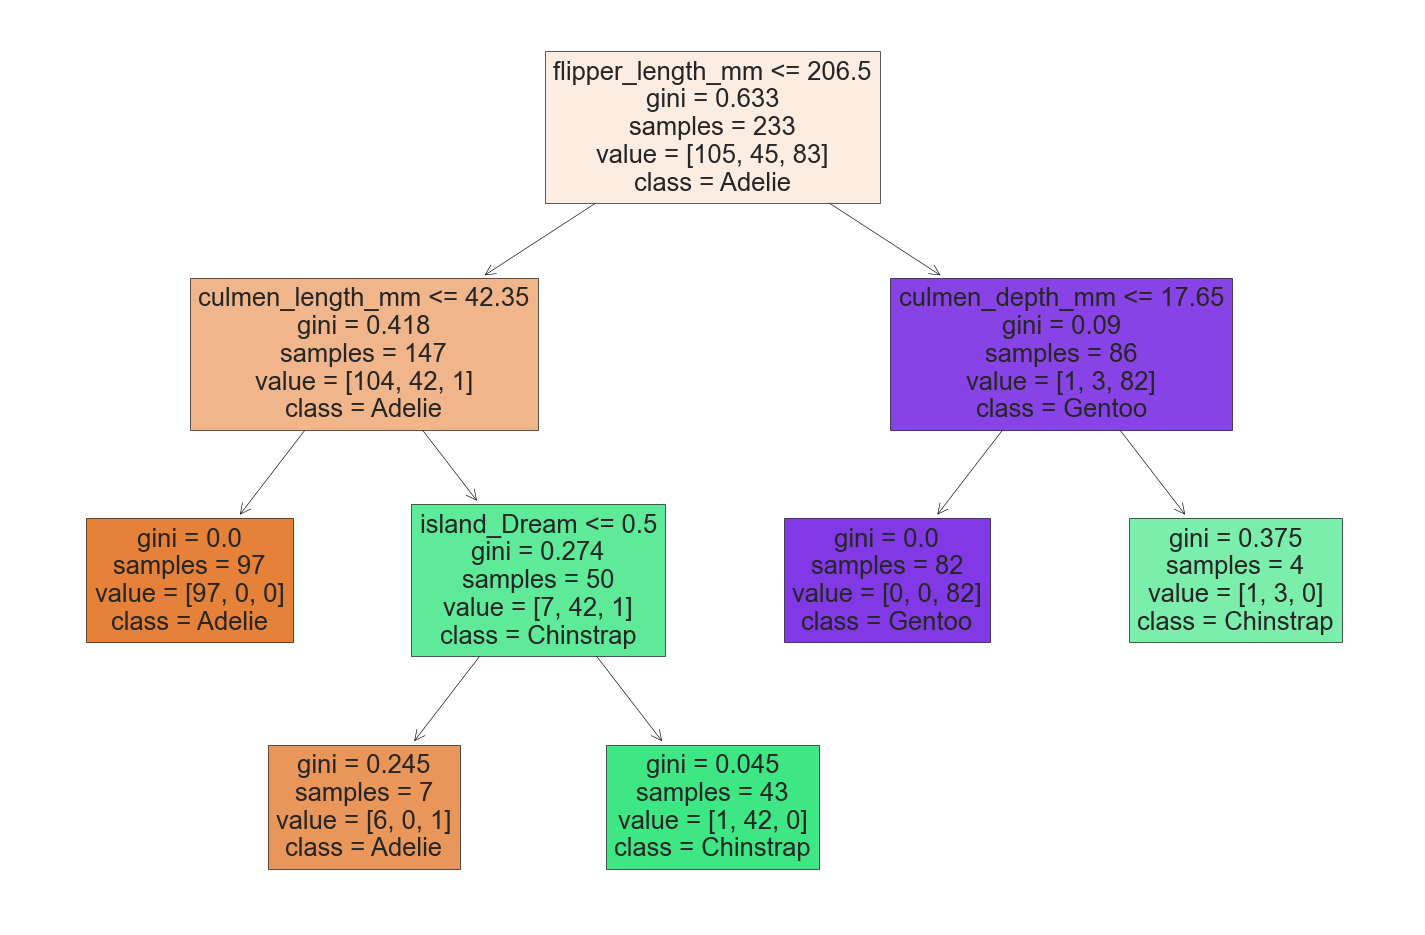

In [62]:
report_model(pruned_tree_2)

## Criterion

In [63]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





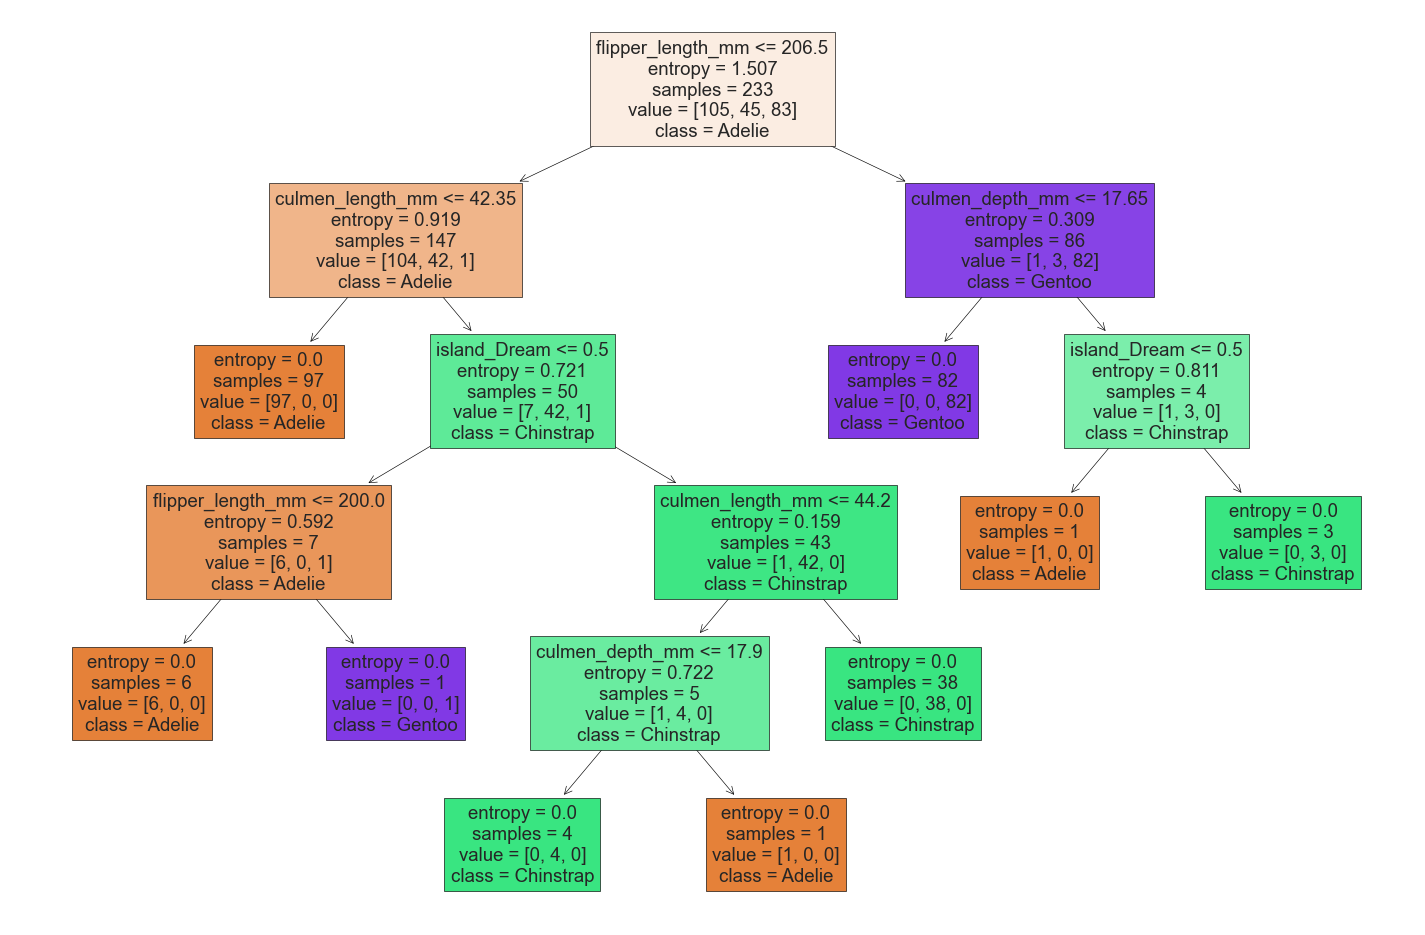

In [64]:
report_model(entropy_tree)

## Max_features, Splitter

In [65]:
tree = DecisionTreeClassifier(splitter = "random", max_features=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=3, splitter='random')



[[41  0  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101





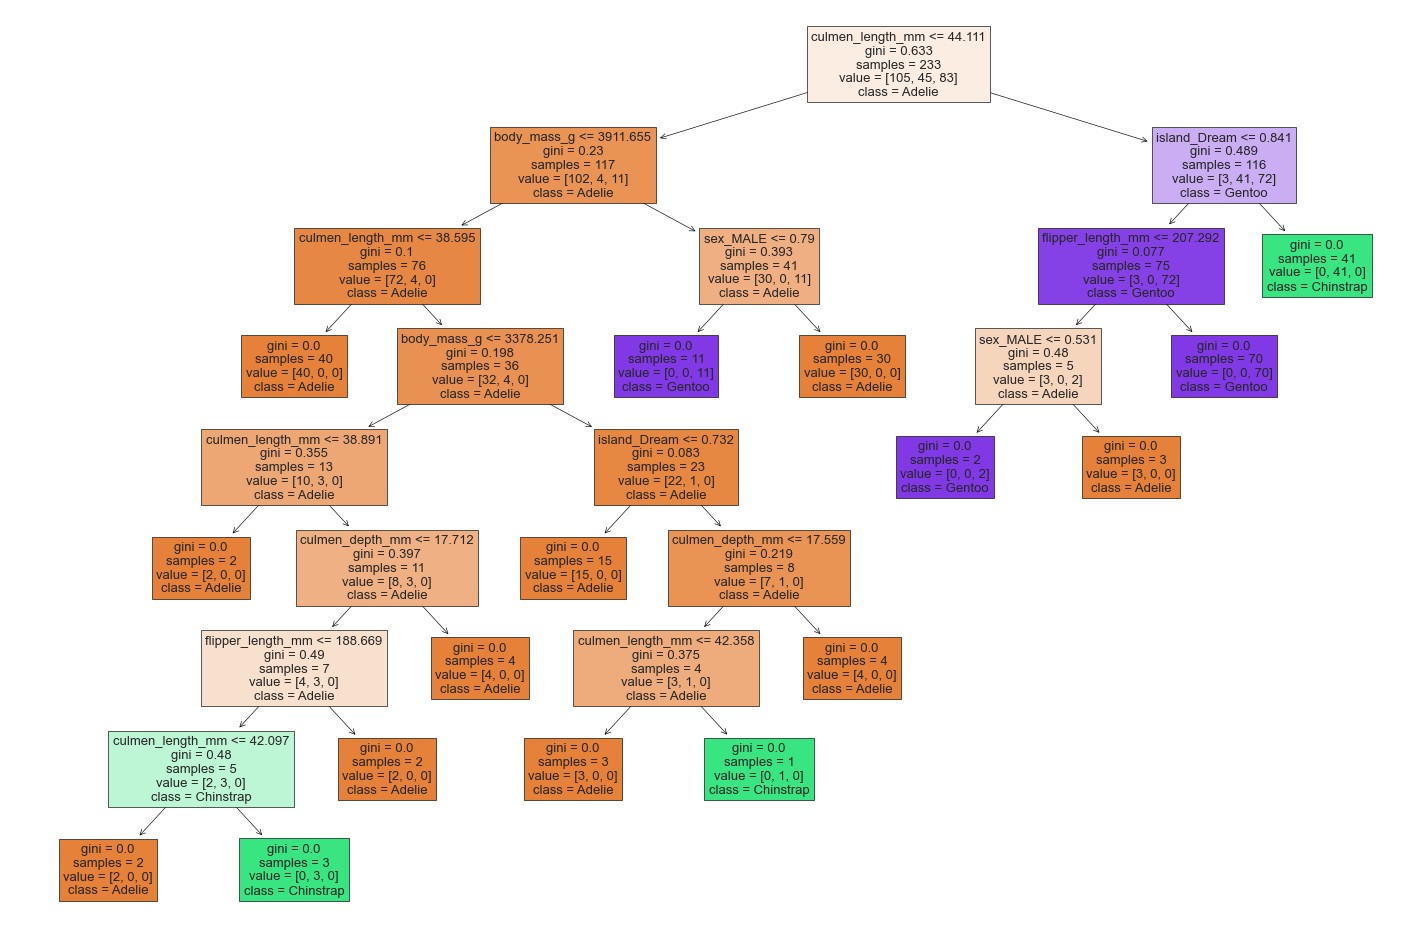

In [66]:
report_model(tree)

## Find Best Parameters

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {"criterion": ["entropy", "gini"], 
       "splitter" : ["best", "random"],
       "max_depth": [1,2,3,4,5,6,7],
       "min_samples_leaf": [0.1,1,2,3,4,5,6,7,10]}

In [69]:
model = DecisionTreeClassifier()
decision_grid_model = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [70]:
decision_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=0.1, splitter=best, score=0.783, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=best, score=0.783, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, splitte

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best, score=0.978, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=best, score=0.913, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, splitter=random, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=2,

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, splitter=random, score=0.848, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, splitter=random, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=6, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=best, score=0.979, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=best, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=best, score=0.978, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=random, score=0.979, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=random, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, splitter=random, score=0.979, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=best, score=0.935, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=random, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=7, splitter=random, score=0.936, total=   0.0s
[CV] criterion=entropy, max_dept

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, splitter=random, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best, score=0.978, total=   0.0s
[CV] criterion=entropy, max_depth=4, m

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=random, score=0.935, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=random, score=0.935, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, ma

[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, splitter=random, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, splitter=random, score=0.891, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, splitter=best, score=0.979, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, sp

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=best, score=0.913, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=random, score=0.702, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=0.1, splitter=random, score=0.723, total=   0.0s
[CV] crite

[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best, score=0.978, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, 

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best, score=0.979, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random, score=1.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random, score=1.000, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best, score=0.936, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best, score=0.978, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best, score=0.957, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=random, score=0.979, total=   0.0s
[CV] criterion=entropy, max_depth=7,

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best ..
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best ..
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best ..
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best ..
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, splitter=best, score=0.783, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, splitter=random, score=0.702, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, splitte

[CV]  criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random, score=0.681, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random, score=0.553, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random, score=0.761, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=7, splitter=random, score=0.652, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=10, splitter=best .
[CV]  criterion=gini, max_depth=1, min_samples_leaf=10, splitter=best, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, splitter=best, score=0.978, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, splitter=best ..
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, splitter=best, score=0.913, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random, score=0.936, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random, score=0.660, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random, score=0.766, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, splitter=random, score=0.848, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, s

[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random, score=0.745, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, splitter=random, score=0.913, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=0.1, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=0.1, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samp

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, splitter=random, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, splitter=random, score=0.936, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, splitter=random, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, splitter=random, score=0.935, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, splitter=best ..
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, splitter=best ..
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, splitter=best, score=0.915, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, s

[CV]  criterion=gini, max_depth=4, min_samples_leaf=0.1, splitter=random, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best, score=0.979, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best, score=0.979, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, split

[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best, score=0.894, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best, score=0.936, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best, score=0.978, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, splitte

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best, score=0.915, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random, score=0.979, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, splitter=random, score=0.915, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, split

[CV]  criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best, score=0.894, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best, score=0.936, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best, score=0.935, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=7, splitter=random, score=0.936, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=7, splitte

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, splitter=best, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, splitter=best, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, splitter=best, score=0.978, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random, score=0.894, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, spl

[CV]  criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best, score=0.913, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best .
[CV]  criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best, score=0.913, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random, score=0.957, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random, score=0.979, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random, score=0.978, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples

[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:    4.6s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [0.1, 1, 2, 3, 4, 5, 6, 7, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [71]:
decision_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [72]:
y_pred_grid = decision_grid_model.predict(X_test)

In [73]:
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

